<a href="https://colab.research.google.com/github/myungjinma/acorn_python/blob/main/0715_47%EC%9D%BC%EC%B0%A8_ML%5Bcancer%2C_get_frc%2CRandomForestClassifier%2Czero_features%2C%ED%91%9C%EC%A4%80%EC%A0%95%EA%B7%9C%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [ ]:
from  sklearn.datasets import load_breast_cancer

In [ ]:
cancer = load_breast_cancer()

악성, 양성 판단 이진 분류

In [ ]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

malignant 악성
benign 양성

In [ ]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [ ]:
X_features = cancer.data

In [ ]:
X_features

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [ ]:
y_label = cancer.target

In [ ]:
y_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
cancer_df = pd.DataFrame(X_features, columns=cancer.feature_names)

In [ ]:
cancer_df['target'] = y_label

In [ ]:
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
cancer_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [ ]:
cancer_df.target.value_counts()

1    357
0    212
Name: target, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size = 0.3, random_state=156)

In [ ]:
lr_clf = LogisticRegression(max_iter=5000)
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)

In [ ]:
pred.shape , y_test.shape

((171,), (171,))

In [ ]:
def get_frc(y_test, pred=None, pred_probas= None):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test, pred)
  roc_aucs = None
  if pred_probas is not None:
    roc_aucs = roc_auc_score(y_test, pred_probas)
  print(confusion, accuracy, precision, recall , f1, roc_aucs)

In [ ]:
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

In [ ]:
pred_proba.shape

(171,)

In [ ]:
get_frc(y_test,pred, pred_proba)

[[ 46  10]
 [  5 110]] 0.9122807017543859 0.9166666666666666 0.9565217391304348 0.9361702127659574 0.9835403726708074


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt_clf = DecisionTreeClassifier()

In [ ]:
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
pred = dt_clf.predict(X_test)

In [ ]:
accuracy_score(y_test, pred)

0.9239766081871345

In [ ]:
get_frc(y_test, pred)

[[ 48   8]
 [  5 110]] 0.9239766081871345 0.9322033898305084 0.9565217391304348 0.944206008583691 None


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(random_state= 0)

In [ ]:
rf.fit(X_train, y_train)
pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('RandomForest Accuracy : ', np.round(accuracy, 4))

RandomForest Accuracy :  0.9415


In [ ]:
get_frc(y_test, pred)

[[ 50   6]
 [  4 111]] 0.9415204678362573 0.9487179487179487 0.9652173913043478 0.9568965517241379 None


In [ ]:
diabetes = pd.read_csv('./drive/MyDrive/diabetes.csv')

In [ ]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
X = diabetes.iloc[:, :-1]
y = diabetes.iloc[:, -1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=123)

In [ ]:
dt_clf = DecisionTreeClassifier()

In [ ]:
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
get_frc(y_test, pred)

[[77 23]
 [18 36]] 0.7337662337662337 0.6101694915254238 0.6666666666666666 0.6371681415929203 None


In [ ]:
lr_clf = LogisticRegression(max_iter=5000)

In [ ]:
lr_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
pred_proba = dt_clf.predict_proba(X_test)[:, 1]

In [ ]:
get_frc(y_test, pred, pred_proba)

[[77 23]
 [18 36]] 0.7337662337662337 0.6101694915254238 0.6666666666666666 0.6371681415929203 0.7183333333333333


In [ ]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <a list of 10 Patch objects>)

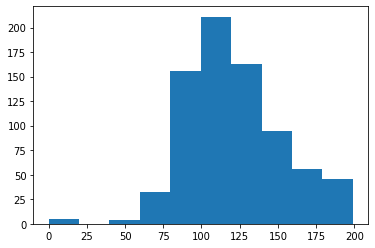

In [ ]:
plt.hist(diabetes['Glucose'], bins=10)

(array([3., 1., 2., 1.]),
 array([0.1, 1.2, 2.3, 3.4, 4.5]),
 <a list of 4 Patch objects>)

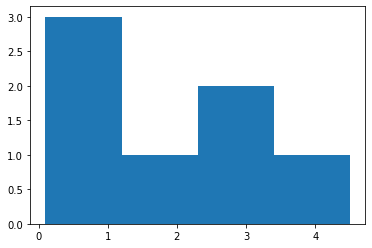

In [ ]:
weight = [0.6, 1.3, 2.8, 3.4, 4.5, 0.2, 0.1]
plt.hist(weight, bins=4)

In [ ]:
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [ ]:
total_count = diabetes['Glucose'].count()

In [ ]:
total_count

768

In [ ]:
zero_count = diabetes[diabetes['Glucose']==0]['Glucose'].count()

In [ ]:
zero_count

5

In [ ]:
for feature in zero_features:
  zero_count = diabetes[diabetes[feature]==0][feature].count()
  print(feature, zero_count)

Glucose 5
BloodPressure 35
SkinThickness 227
Insulin 374
BMI 11


In [ ]:
mean_zero = diabetes[zero_features].mean()

In [ ]:
mean_zero

Glucose          120.894531
BloodPressure     69.105469
SkinThickness     20.536458
Insulin           79.799479
BMI               31.992578
dtype: float64

In [ ]:
diabetes[zero_features] = diabetes[zero_features].replace(0, mean_zero)

In [ ]:
for feature in zero_features:
  zero_count = diabetes[diabetes[feature]==0][feature].count()
  print(feature, zero_count)

Glucose 0
BloodPressure 0
SkinThickness 0
Insulin 0
BMI 0


In [ ]:
X = diabetes.iloc[:,:-1]
y = diabetes.iloc[:,-1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=123)

In [ ]:
lr_clf = LogisticRegression(max_iter=5000)

In [ ]:
lr_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
pred_proba = dt_clf.predict_proba(X_test)[:, 1]

In [ ]:
get_frc(y_test, pred, pred_proba)

[[78 22]
 [19 35]] 0.7337662337662337 0.6140350877192983 0.6481481481481481 0.6306306306306307 0.7140740740740741


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
min_max_scaler = MinMaxScaler()
X_min_max = min_max_scaler.fit_transform(X)
standard_scaler = StandardScaler()
X_standard = standard_scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_min_max, y, test_size=0.2, stratify = y, random_state=123)

In [ ]:
lr_clf = LogisticRegression(max_iter=5000)
lr_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
pred_proba = dt_clf.predict_proba(X_test)[:, 1]
get_frc(y_test, pred, pred_proba)

[[100   0]
 [ 54   0]] 0.6493506493506493 0.0 0.0 0.0 0.5


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_standard, y, test_size=0.2, stratify = y, random_state=123)

In [ ]:
lr_clf = LogisticRegression(max_iter=5000)
lr_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
pred_proba = dt_clf.predict_proba(X_test)[:, 1]
get_frc(y_test, pred, pred_proba)

[[100   0]
 [ 54   0]] 0.6493506493506493 0.0 0.0 0.0 0.5


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#표준 정규

- Decision Node : 규칙 조건

- Leaf Node : 결정된 분류 (class)값

- 서브 트리 : 새로운 규칙이 추가되면 그 밑에 작은 나무 구조가 덧붙여진다.

정보의 균일도 : 정보 이득 지수 , 지니 계수

지니계수 높으면 불순도가 높다 -> 지니계수가 낮은 방향으로 규칙을 정한다.

정보 이득

엔트로피 불순도하고 비슷한 것임

정보이득 높으면 불순도가 낮다 - > 정보이득이 높은 방향으로 규칙을 정한다.

정보 이득 = 1- 엔트로피

$$
G = 1-{\sum_{j=1}^c} {(nj \over n)^2}
$$

$$
G = 1 - {(3 \over 5)^2 +(2 \over 5)^2}
$$

전체 16개 , m = 16

pk = 박스에 속하는 공에서 k범주(빨강, 파랑)에 속하는 공의 개수

k= 1 = 빨강색 , 10개, pk =10/16

k= 2 = 파란색 , 6개, pk = 6/16
$$
E = -{10 \over 16}log_2{10 \over 16} - {6 \over 16}log_2{6 \over 16}~~ 0.95
$$